#Abstract

The purpose of this project is to use the data provided through Ireland's Covid-19 Data Hub to create a model that represents the relation of covid cases to covid deaths. This model will then be used to develop to answer the following questions:



1. Given the large number of deaths in the first stage of the pandemic, if extensive testing
was in place how many cases would have been diagnosed?




2. If the vaccines had been ineffective against ”Omicron”, how many deaths would have occured?




# Introduction

The COVID-19 pandemic has affected the entire world since its outbreak in December 2019. The availability of large amounts of data related to COVID-19 has led to an increase in the application of data science and analysis techniques to understand the spread and impact of the virus. One way to measure the impact of the pandemic is by tracking the number of COVID-19 cases and deaths over time.

Linear regression is a statistical technique that can be used to analyze the relationship between two variables. In the context of COVID-19 data, linear regression can be used to model the relationship between the number of cases and deaths. By fitting a linear regression model to the data, we can estimate the impact of these variables on the number of cases or deaths over time.

Linear regression was chosen for its simplicity and efficiency. It is efficent for a computer to run, is capable of handling a lot of variables and can easily be implemented in python using the avaible software packages.

Ireland had considerably difficulty in the beginning of the pandemic with testing enough patients to get a proper understanding of the spread of covid in the country. Using linear regression, this project will estimate the overall cases based off the covid deaths.

One key development in the COVID-19 pandemic has been the rollout of vaccines. As vaccination efforts have ramped up, there has been a significant impact on COVID-19 data. For example, the number of deaths has decreased in countries with high rates of vaccination, this project will analyse the death rate if the vaccine wasn't effective against the omnicron strain.

The data we will be using for the overall analysis of the system is provided through Ireland's Covid-19 Data Hub, this will allow for the development of a linear regression model and the data to analyse.

Overall, the analysis of COVID-19 data is an important tool to understand what happened in the pandemic and the effect that some of the interventions such as the vaccinations, had on the pandemic.


# Introduction
The COVID-19 pandemic has had a significant impact on global public health. One way to measure the impact of the pandemic is by tracking the number of COVID-19 cases and deaths over time. These data can provide valuable insights into the spread of the virus and the effectiveness of various interventions aimed at controlling its transmission.

Linear regression is a statistical technique that can be used to analyze the relationship between two variables. In the context of COVID-19 data, linear regression can be used to model the relationship between the number of cases and deaths. By fitting a linear regression model to the data, we can estimate the impact of these variables on the number of cases or deaths over time.

Linear regression can be particularly useful in predicting future trends in COVID-19 cases and deaths. By extrapolating the linear regression model, we can estimate the expected number of cases or deaths in the future, based on the observed trends in the data. In this case we will be observing what the total cases would have been if we had more extensive testing in the beginning of the pandemic and the number of cases that would have occured if vaccines were innefective against the "Omnicron" variant of Covid.

Overall, linear regression provides a powerful tool for analyzing COVID-19 data and understanding the factors that contribute to the spread of the virus. By combining data analysis techniques with effective public health policies, we can work together to mitigate the impact of future pandemics and protect public health.

# Setup

In order to analyse this data and produce our predictions we need to import several python liabries. The first one is panda. This allows for the code to have databases.

Matplotlib.pyplot allows the code to create plots of the data. This allows for easier visulisation and understanding.

Numphy is a scientific computing package in python. It allows for easy creation, manipulation and storage of arrays.

Scipy stands for scientific python it allows us to understand the delay between the cases and the corresponding deaths. And also have the code required to remove outliers.

sklearn.linear_model allows for the use of a python function which finds the linear regression of the data to be created. This will be used for the predictions.

sklearn.metrics allows for the linear regression to be analysed to a greater extent

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal, stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

#Allows for easy access of the CSV file, via a hyperlink to github.
df = pd.read_csv('https://raw.githubusercontent.com/MC1R-coder/Machiene-learning-project-1/main/CSV%20File/COVID-19_HPSC_Detailed_Statistics_Profile-01-23%20(1).csv')

# Creating a lag function

---

It's important that the delay between the cases and the deaths are understood. A person who dies due to covid, caught covid earlier than the day the death occurs. This is why the lag finder is used to find the delay between the cases and deaths.

In [ ]:
def lag_finder(y1, y2):

    # Get the length of the input arrays
    n = len(y1)

    # Compute the cross-correlation between y1 and y2
    corr = signal.correlate(y2, y1, mode='same')

    # Create an array of delays that spans half the length of the input arrays
    delay_arr = np.linspace(-0.5*(n), 0.5*(n), n)

    # Find the delay value that corresponds to the maximum correlation
    delay = delay_arr[np.argmax(corr)]

    # Print the result of the delay calculation
    print('Deaths are ' + str(delay) + ' days behind cases')

    # Return the delay value
    return delay

# Selecting data

This extracts the data in the confirmed covid cases column and the confirmed covid deaths in the .csv file. It also changes any Na or blank variables to 0

In [ ]:
cases = df['ConfirmedCovidCases']
deaths = df['ConfirmedCovidDeaths'].fillna(0) # Convert NaN to 0

# Linear regression during extensive testing

Extensive testing was achieved between September 2020 to March 2021.
During this time the testing averages to aproximately 442,500 tests a month.
https://covid19ireland-geohive.hub.arcgis.com/pages/0814b13a2f2b4458a36105502c8e92e8


We stopped using the data after the beginning of March because after this Covid vaccines began to obscure the data.
https://covid-19.geohive.ie/pages/vaccinations

In [ ]:
#Extracting data from excel file
Extensive_testing_of_cases = cases[186:367].reset_index(drop=True)
Extensive_testing_of_deaths = deaths[186:367].reset_index(drop=True)

The roll over average creates smoother data. This allows for a decrease in the variance.

In [ ]:
ave7_cases_linear_regression_data = Extensive_testing_of_cases.rolling(window=7,min_periods=1).mean() # getting 7 day roll over avg.
ave7_deaths_linear_regression_data = Extensive_testing_of_deaths.rolling(window=7,min_periods=1).mean()

In [ ]:
def plot_data(y1, y2, x1, x2):
    # Set the figure size to 10 inches by 5 inches
    plt.figure(figsize=(10, 5))

    # Create a subplot with 2 rows and 1 column, and select the first subplot
    plt.subplot(211)

    # Plot the first dataset (y1) with a label of 'Cases'
    plt.plot(y1, label='Cases')

    # Plot the second dataset (x1) with a label of '7 Day Average'
    plt.plot(x1, label='7 Day Average')

    # Set the title for the first subplot
    plt.title("Covid Cases", color="purple")

    # Set the y-axis label for the first subplot
    plt.ylabel('Cases', fontsize=14, color="blue", weight="bold")

    # Set the x-axis label for the first subplot
    plt.xlabel('Day', fontsize=14, color="blue", weight="bold")

    # Add a legend to the first subplot
    plt.legend(loc='upper center')

    # Select the second subplot
    plt.subplot(212)

    # Plot the second dataset (y2) with a label of 'Deaths'
    plt.plot(y2, label='Deaths')

    # Plot the fourth dataset (x2) with a label of '7 Day Average'
    plt.plot(x2, label='7 Day Average')

    # Set the title for the second subplot
    plt.title("Covid Deaths", color="purple")

    # Set the y-axis label for the second subplot
    plt.ylabel('Deaths', fontsize=14, color="blue", weight="bold")

    # Set the x-axis label for the second subplot
    plt.xlabel('Day', fontsize=14, color="blue", weight="bold")

    # Add a legend to the second subplot
    plt.legend(loc='upper center')

    # Ensure there is sufficient spacing between subplots
    plt.tight_layout()

    # Display the plot
    plt.show()


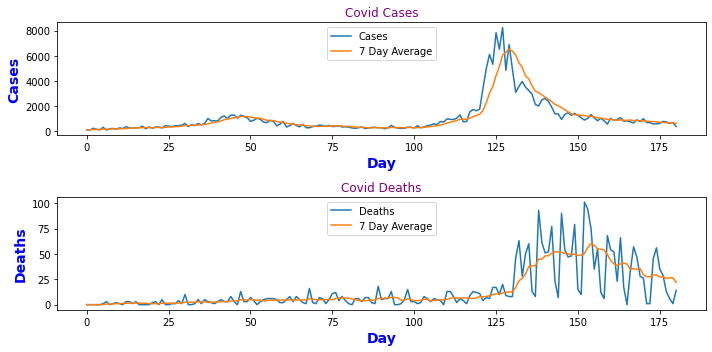

In [ ]:
#Call the function allowing the data to be plotted
plot_data(Extensive_testing_of_cases,Extensive_testing_of_deaths,ave7_cases_linear_regression_data,ave7_deaths_linear_regression_data)

The following code calls the lag function and finds the delay between cases and deaths

In [ ]:
#Calls the delay function and rounds to the nearest day.
delay = round(lag_finder(ave7_cases_linear_regression_data,ave7_deaths_linear_regression_data))
print("This is rounded to {0} days".format(delay))

Deaths are 17.09444444444445 days behind cases
This is rounded to 17 days


When the amount of days that it takes for a case to effect a death is understood, then the cases are related to the deaths that they caused. This is achieved through analysing the deaths that occur after the days that are a delay.

In [ ]:
Extensive_testing_of_deaths = deaths[186+delay:367+delay].reset_index(drop=True) #extracting data

In [ ]:
#Updated average to take into account the delay
ave7_deaths_linear_regression_data = Extensive_testing_of_deaths.rolling(window=7,min_periods=1).mean()

# Removing outliers

In order to have the predictions as accurate as possible we need to remove outliers. The z-score threshold for what is condsidered an outlier is 2. This removes any data that is 2 standard deviations from the mean. 95.45% is the amount of data which is kept. The remaining 4.55% are outliers which will obscure the data.

In [ ]:
#removing of outliers

#Sets the threshold to 2
threshold=2

#Finds the Z_score
cases_ZScore = np.abs(stats.zscore(ave7_cases_linear_regression_data))
deaths_ZScore = np.abs(stats.zscore(ave7_deaths_linear_regression_data))

#Removes the data points that exceeds the threshold
Cases_during_limited_testing_without_outliers = ave7_cases_linear_regression_data[(cases_ZScore <= threshold) & (deaths_ZScore <= threshold)]
Deaths_during_limited_testing_without_outliers = ave7_deaths_linear_regression_data[(cases_ZScore <= threshold) & (deaths_ZScore <= threshold)]

The linear regression function that will be used in this case requires the data to be in a 2d numphy array. In order to achieve this we convert the series into an array then we reshape it, so that it is 2D.

In [ ]:
#Shapes array into acceptable format for linear regression
extensive_testing_of_cases_2d_array = np.reshape(Cases_during_limited_testing_without_outliers.to_numpy() , (-1,1))
extensive_testing_of_deaths_2d_array = np.reshape(Deaths_during_limited_testing_without_outliers.to_numpy() , (-1,1))

We now input the 2 arrays into the linear regression function this finds  the slope and the y intercept. These two pieces of data allow us to estimate the value of the cases using the deaths or predict the deaths that could of occured if the vaccine was ineffective.

In [ ]:
#either this or the next line. inputtng data regression model
mdl = LinearRegression().fit(extensive_testing_of_deaths_2d_array,extensive_testing_of_cases_2d_array)

#defining slope of lin. reg.
m = mdl.coef_[0]

#y intercept (y=mx+b), as x goes to 0
b = mdl.intercept_

#Prints the user the equation of the line. This data can be used to predict other data.
print("formula: Predicted Cases = {0} x Deaths + {1}".format(m, b))

formula: Predicted Cases = [34.99393761] x Deaths + [275.5384098]


In [ ]:
#Gets the max deaths allowing the graph to be formatted correctly
Max_death = round(np.max(extensive_testing_of_deaths_2d_array))

#Demonstrating success of linear regression

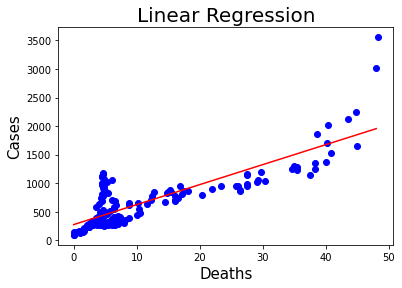

In [ ]:
#Plots the scatter graph with the deaths vs cases
plt.scatter(extensive_testing_of_deaths_2d_array,extensive_testing_of_cases_2d_array, color='blue')

#Plots the linear regression
plt.plot([0,Max_death],[b,m*Max_death+b],'r')

#Title of graph
plt.title('Linear Regression', fontsize = 20)

#Labels X-axis
plt.xlabel('Deaths', fontsize = 15)

#Labels Y-axis
plt.ylabel('Cases', fontsize = 15)

#Plots the graph
plt.show()

The R-squared value allows us to determine the reliability of the data. R-squared is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable in a regression model.

The Mean Absolute Error (MAE) is simply the average of the absolute differences between the actual values and the predicted values, and it provides a measure of the magnitude of the errors, regardless of their direction. This allows for a clear understanding of the difference between the real and predicted cases.

In [ ]:
#calculate R-squared of regression model
r_squared = mdl.score(extensive_testing_of_deaths_2d_array,extensive_testing_of_cases_2d_array)

#view R-squared value
print(r_squared)

# Calculate the MAE
MAE = mean_absolute_error(extensive_testing_of_cases_2d_array, mdl.predict(extensive_testing_of_deaths_2d_array))

print("MAE:", MAE)

0.6863483960612018
MAE: 201.26798725284073


# Cases if the testing was extensive in the beginning
From the day the data began 29/02/2020 to 01/09/2020 before extensive testing

In [ ]:
#Gathering of data regarding covid deaths
Cases_during_limited_testing = cases[0:186].reset_index(drop=True)
Deaths_during_limited_testing = deaths[0:186].reset_index(drop=True)

Calls Lag Function

In [ ]:
delay = round(lag_finder(Cases_during_limited_testing,Deaths_during_limited_testing))
print("This is rounded to {0} days".format(delay)) #producing answer

Deaths are 5.529729729729723 days behind cases
This is rounded to 6 days


In [ ]:
Deaths_during_limited_testing = deaths[0+delay:186+delay].reset_index(drop=True)

The roll over average creates smoother data.

In [ ]:
#Cases = deaths(m) +b
Cases_prediction = Deaths_during_limited_testing * m + b #using eqn. of line to make prediction

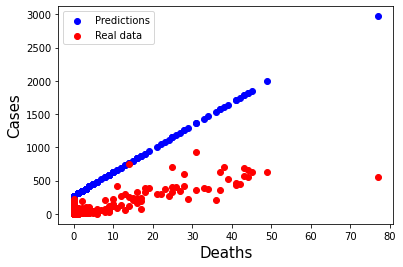

In [ ]:
#Plots the scatter graph with the deaths vs cases prediction
line1 = plt.scatter(Deaths_during_limited_testing,Cases_prediction, color='blue')

#Plots the scatter graph with the deaths vs cases
line2 = plt.scatter(Deaths_during_limited_testing,Cases_during_limited_testing, color='red')

#Plots the legend
plt.legend(["Predictions" , "Real data"])

#Labels the x-axis
plt.xlabel('Deaths', fontsize = 15)

#Labels the y-axis
plt.ylabel('Cases', fontsize = 15)

#Shows the graph
plt.show()

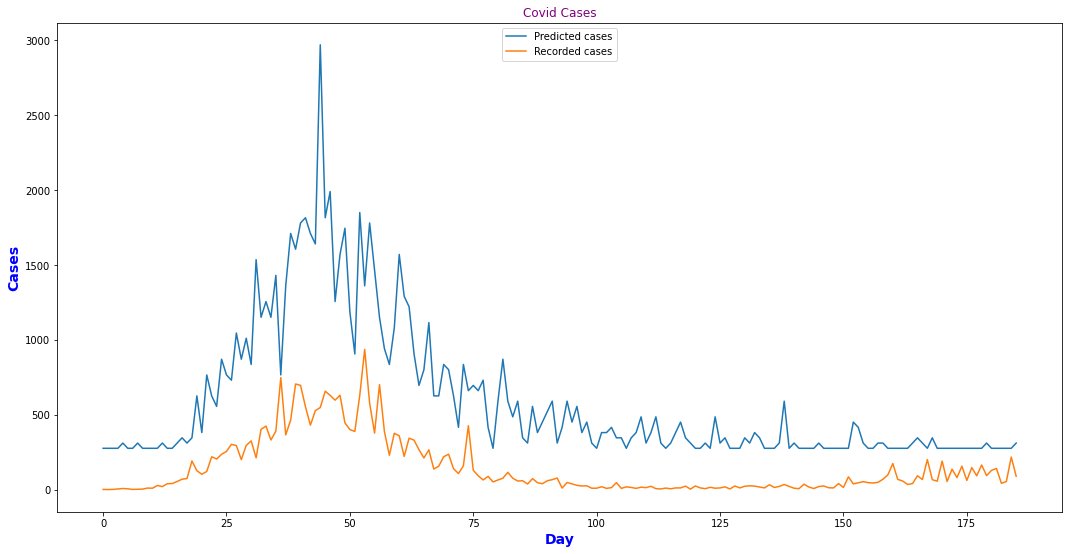

In [ ]:
#comparing recorded cases vs estimated cases based off deaths

# 18 in by 9 in
plt.figure(figsize = (18,9))

#Plots predicted cases
plt.plot(Cases_prediction, label='Predicted cases')

#Plots cases during limited testing
plt.plot(Cases_during_limited_testing, label='Recorded cases')

#Plots title
plt.title("Covid Cases", color ="purple")

#Labels Y-axis
plt.ylabel('Cases', fontsize=14, color="blue", weight="bold")

#Labels X-axis
plt.xlabel('Day', fontsize=14, color="blue", weight="bold")

#Plots legend
plt.legend(loc='upper center')

#Shows the graph
plt.show()

In [ ]:
Sum_real=round(sum(Cases_during_limited_testing))
Sum_pred=round(sum(Cases_prediction))
#Summimg the actual and predicted case numbers and printing.
print("The number of cases predicted is" ,str(Sum_pred),"whereas the actual is" ,str(Sum_real) )

The number of cases predicted is 110110 whereas the actual is 27050


#Predicting deaths based off omnicron cases

We are going to use the same linear regression plot created earlier from data that occured during extensive testing and limited vaccinations

The omnicron data is gathered between the 1st of December 2021 to 14 of December 2022

The end date was chosen as it allows for buffer time to allow for delays.

In [ ]:
#Gathering of data regarding omincron
Cases_during_omnicron = cases[642:1020].reset_index(drop=True)
Deaths_during_omnicron = deaths[642:1020].reset_index(drop=True)

In [ ]:
#Calls lag finder function to find the delay
delay = round(lag_finder(Cases_during_omnicron,Deaths_during_omnicron))
print("This is rounded to {0} days".format(delay))

Deaths are 32.586206896551715 days behind cases
This is rounded to 33 days


In [ ]:
Deaths_during_omnicron = deaths[642+delay:1020+delay].reset_index(drop=True)

In [ ]:
#y = mx + b
# cases = m( deaths ) + b
#deaths = (cases - b)/m
Predicted_deaths_during_omnicron_with_ineffective_vaccine = (Cases_during_omnicron - b) / m

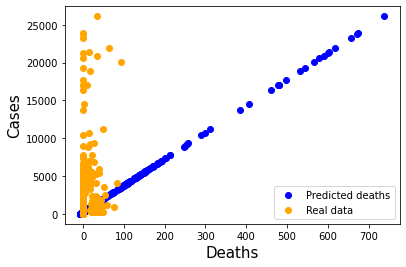

In [ ]:
#Plots the scatter graph with the death estimation vs cases prediction
plt.scatter(Predicted_deaths_during_omnicron_with_ineffective_vaccine,Cases_during_omnicron, color='blue')

#Plots the scatter graph with the deaths during omnicron vs cases
plt.scatter(Deaths_during_omnicron,Cases_during_omnicron, color='orange')

#Plots the legend
plt.legend(["Predicted deaths" , "Real data"])

#Labels the x-axis
plt.xlabel('Deaths', fontsize = 15)

#Labels the y-axis
plt.ylabel('Cases', fontsize = 15)

#Shows the graph
plt.show()

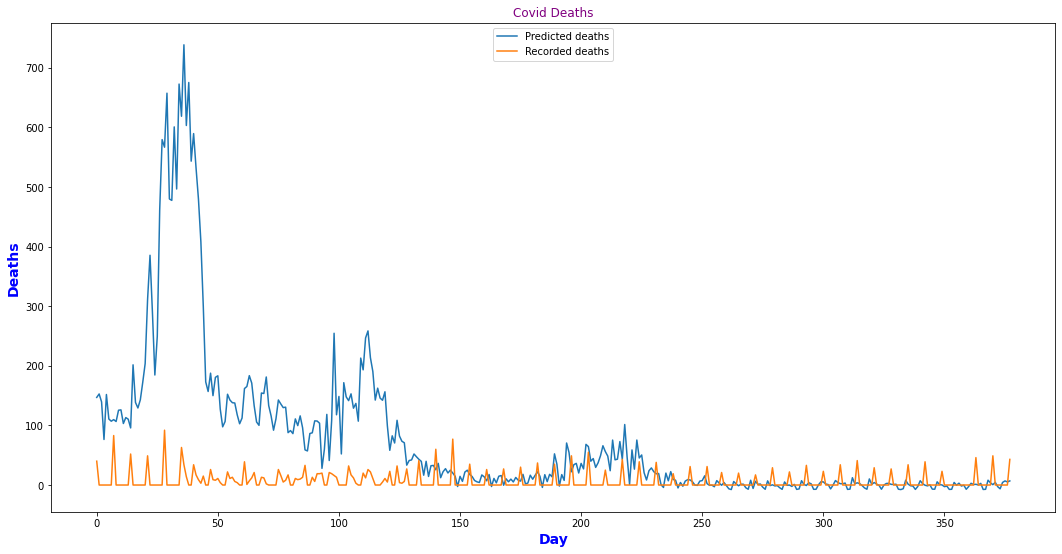

In [ ]:
# 18 in by 9 in
plt.figure(figsize = (18,9))

#Plots death estimation
plt.plot(Predicted_deaths_during_omnicron_with_ineffective_vaccine, label='Predicted deaths')

#Plots deaths during omnicron
plt.plot(Deaths_during_omnicron, label='Recorded deaths')

#Plots title
plt.title("Covid Deaths", color ="purple")

#Labels Y-axis
plt.ylabel('Deaths', fontsize=14, color="blue", weight="bold")

#Labels X-axis
plt.xlabel('Day', fontsize=14, color="blue", weight="bold")

#Plots legend
plt.legend(loc='upper center')

#Shows the graph
plt.show()

In [ ]:

Sum_real=round(sum(Deaths_during_omnicron))

Sum_pred=round(sum(Predicted_deaths_during_omnicron_with_ineffective_vaccine))

#Summimg the actual and predicted case numbers and printing.
print("The total number of deaths that would have occured if the vaccine was ineffective is",str(Sum_pred),"whereas the actual is" ,str(Sum_real) )

The total number of deaths that would have occured if the vaccine was ineffective is 28296 whereas the actual is 2519


# Conclussion

---
In conclusion, the use of linear regression to analyze COVID-19 data in Ireland provides a powerful tool for understanding the factors the spread of the virus and predicting future trends in cases and deaths.

While linear regression is an accurrate method to understanding the relation of the cases and the deaths. However, the coefficient of determination is 0.686 and the mean absolute error is 201.27. The coefficient of determination is low meaning it could have limited accuracy, however the mean absolute error has a small difference considering the scale of the case number.

Through the use of linear regression, a proper understanding of the cases in Ireland during the early stages of the pandemic can be gained through the comparrison of the deaths to cases. We found that the total number of cases predicted between 29/02/2020 to 01/09/2020 is 110110 whereas the actual is 27050.

The total number of deaths that would have occured if the vaccine was ineffective between the 1st of December 2021 to 14 of December 2022 is 28296 whereas the actual is 2519. Through the linear regression slope it can be found that for every 35 cases a covid death occured. This is a fatality rate of 2.86%.

 This reports analysis highlights the critical importance of the successful rollout of COVID-19 vaccines, in mitigating the impact of the pandemic in Ireland. As of February 2023, over 90% of the eligible population in Ireland has received at least one dose of a COVID-19 vaccine, and this has contributed to a significant decrease in the number of COVID-19 deaths.
